In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

In [2]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained BERT model
model = SentenceTransformer('pritamdeka/S-PubMedBert-MS-MARCO')

/home/qwu/anaconda3/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [5]:
df = pd.read_csv("../reports_filtered.csv")
df

,Unnamed: 0,pt_shsc_id,imaging_date,healthy,fracture_or_metastases,ServDescription,ReportDate,ReportText
0,147,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2010-01-20,0.0,0.0,Bone Mass Density High Risk - Multiple Sites,2010-01-21 11:39:00.140,bone densitometry (dxa): a baseline bone densi...
1,260,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2011-02-02,1.0,0.0,Bone Scan(Whole Body)Nuc Med,2011-02-02 16:24:11.000,technetium mdp bone scan findings: there is a ...
2,272,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2011-02-02,1.0,0.0,X-Ray Chest PA+LAT Routine,2011-02-02 09:12:24.000,chest pa and lateral reference:no previous the...
3,311,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2011-04-11,0.0,1.0,Abdomen + Pelvis CT with oral C+,2011-04-12 16:27:57.000,ct abdomen pelvis (enhanced) comparison: ct da...
4,389,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2011-06-06,0.0,1.0,Abdomen + Pelvis CT with oral C+,2011-06-06 15:08:04.000,ct abdomen pelvis (enhanced) comparison: ct da...
...,...,...,...,...,...,...,...,...
1362,60124,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-01-27,1.0,0.0,Nephrostomy or NUT change,2012-01-27 13:15:45.000,right nephrostomy catheter exchange history: u...
1363,60138,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-01-27,1.0,0.0,Kidney + Bladder US,2012-01-27 18:48:44.000,findings: right nephrostomy tube in situ. mark...
1364,60158,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-08-22,0.0,1.0,Abdomen + Pelvis CT with oral C-,2012-08-23 10:57:52.000,ct abdomen and pelvis volumetric ct images hav...
1365,60172,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-08-22,0.0,1.0,Bone Scan Whole Body+Extra Views+Flow,2012-08-22 15:04:50.000,technetium mdp bone scan whole body: history:p...


In [7]:
df.dtypes

Unnamed: 0                  int64
pt_shsc_id                 object
imaging_date               object
healthy                   float64
fracture_or_metastases    float64
ServDescription            object
ReportDate                 object
ReportText                 object
dtype: object

In [6]:
embeddings = df['ReportText'].apply(model.encode).tolist()
X = np.array(embeddings)
X.shape

(1367, 768)

In [8]:
labels = np.array(df['fracture_or_metastases'] == 1.0)
labels

array([False, False, False, ...,  True,  True,  True])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [10]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.81
F1-score: 0.87


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(ax=ax, cmap=cmap)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('bayes_confusion_matrix.png')
    plt.show()

Confusion matrix, without normalization
[[ 41  38]
 [ 14 181]]


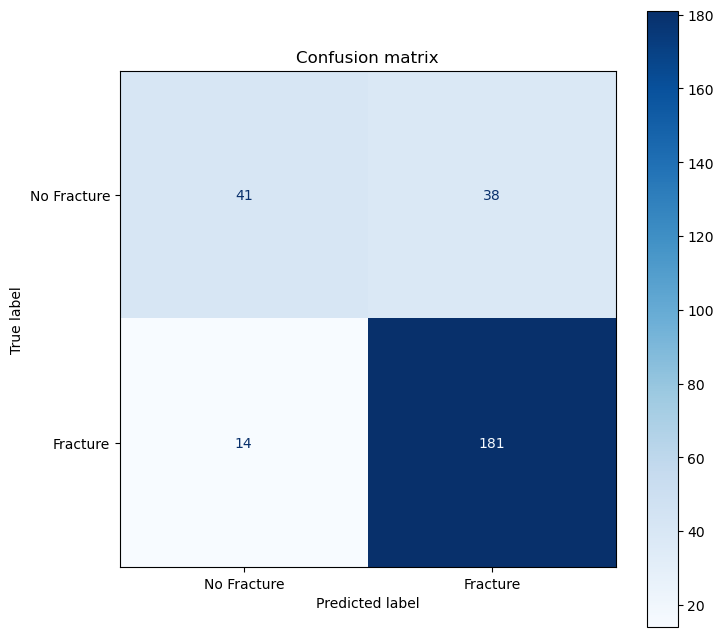

In [14]:
# from sklearn.datasets import make_classification
# from sklearn.naive_bayes import GaussianNB

# # Generate some sample data
# X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, random_state=42)

# # Train a Naive Bayes classifier
# clf = GaussianNB()
# clf.fit(X, y)

# # Predict on the test data
# y_pred = clf.predict(X)

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['No Fracture', 'Fracture'])